# Using keras for the House prices Kaggle challenge

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 100)

Creating datasets

In [3]:
X_train_full = pd.read_csv('./sources/train.csv')
X_test = pd.read_csv('./sources/test.csv')

In [4]:
Y_test = pd.DataFrame()
Y_test['Id'] = (X_test['Id'])
Y_test

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


Feature engineering

In [5]:
X_train_full.fillna(0)
X_train_full['SurfaceTot'] = X_train_full['TotalBsmtSF'] + X_train_full['GrLivArea']
X_train_full = X_train_full.drop(X_train_full[(X_train_full['SurfaceTot'] > 7000)].index).reset_index(drop=True)

In [6]:
X_test.fillna(0)
X_test['SurfaceTot'] = X_test['TotalBsmtSF'] + X_test['GrLivArea']

Split Train_full into train and val datasets

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_val = train_test_split(X_train_full, train_size = 0.8, random_state = 42)

In [9]:
from numpy import transpose
target_column = 'SalePrice'

Y_train = X_train[target_column].values.astype(float)
X_train = transpose([X_train.SurfaceTot.values.astype(float)])

In [10]:
X_test = transpose([X_test.SurfaceTot.values.astype(float)])

In [11]:
X_train

array([[2628.],
       [2370.],
       [2004.],
       ...,
       [2104.],
       [2078.],
       [3060.]])

## TODO :

- Data cleaning
- Take care of Nas

Plot 2D SurfaceTot vs SalePrice

In [12]:
import seaborn as sns
%matplotlib notebook

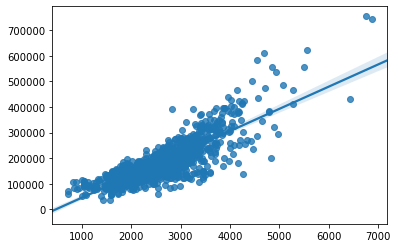

In [13]:
sns.regplot(x = X_train,
            y = Y_train)

## Linear regression with Keras

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [ ]:
from tensorflow.keras.layers import Input
model.add(Input(shape=X_train.shape[1:]))

In [ ]:
from tensorflow.keras.layers import Dense
model.add(Dense(1))

In [ ]:
loss = 'mse'

In [ ]:
from tensorflow.keras.optimizers import SGD
LEARNING_RATE = 0.001
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))

In [ ]:
BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 100 # how many iterations over the whole dataset
history = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Standardize data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

We need to rebuild the model

In [ ]:
hist = pd.DataFrame(history.history)
sns.relplot(x=hist.index, y="loss", kind="line", data=hist)

In [ ]:
Y_test['SalePrice'] = model.predict(x=X_test)

In [ ]:
Y_test

Send to csv file

In [ ]:
Y_test.to_csv('./sources/kaggle_sub.csv', index=False)

###  Kaggle submission

In [ ]:

import kaggle